# Introduction
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information 
on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [41]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [73]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
df = pd.read_csv('/Users/juhimishra/Downloads/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


# EDA

In [4]:
print("No of Rows: ",df.shape[0])
print("No of Column: ",df.shape[1])

No of Rows:  908
No of Column:  25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

here e can see that there are lot many missing data in almost most of the columns and most of the data are in object form

In [6]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


Here we got all the continous data information .analysis for the same mentioned below from this static data:
1. Missing values in most of the column
2. generation growth from 2013 to 2017 are mentioned for every plant.
3. In 2018 the capacity information was reported 
4. fuel3, wepp id and estmated generation growth is nil here
5. chances of skewness are high as in capacity_mw we can see differenced between mean and std are high also quantile data 
   are having huge differnces from 50% to 75% and 75% to max

In [7]:
# will compile all the generation year together
df['total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014']
+ df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017'] 

0               NaN
1               NaN
2               NaN
3       2393.525928
4      17544.949736
           ...     
903     1099.991525
904             NaN
905             NaN
906             NaN
907             NaN
Length: 908, dtype: float64

In [21]:
df.drop(columns=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
                  'generation_gwh_2017'],inplace=True)


In [23]:
df['Total_fuel']=df['other_fuel1']+df['other_fuel2']+df['other_fuel3']

In [26]:
df['Total_fuel'].value_counts()

Series([], Name: Total_fuel, dtype: int64)

In [28]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [29]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [30]:
df['other_fuel3'].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [32]:
# as there is no value in other_fuel3 s will be dropping this column
df.drop(columns=['other_fuel3'],inplace=True)

In [42]:
df['estimated_generation_gwh'].unique()

array([nan])

In [43]:
df['wepp_id'].unique()

array([nan])

In [44]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [ ]:
df.drop=(columns['country','country_long','gppd_idnr','other_fuel2','url','geolocation_source','wepp_id',
                'estimated_generation_gwh'],inplace=True)

In [52]:
df.drop(columns=['Total_fuel'],inplace=True)

In [54]:
df.head(2)

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN


# Using visualization method analyzing columns

<AxesSubplot:xlabel='capacity_mw', ylabel='total_generation'>

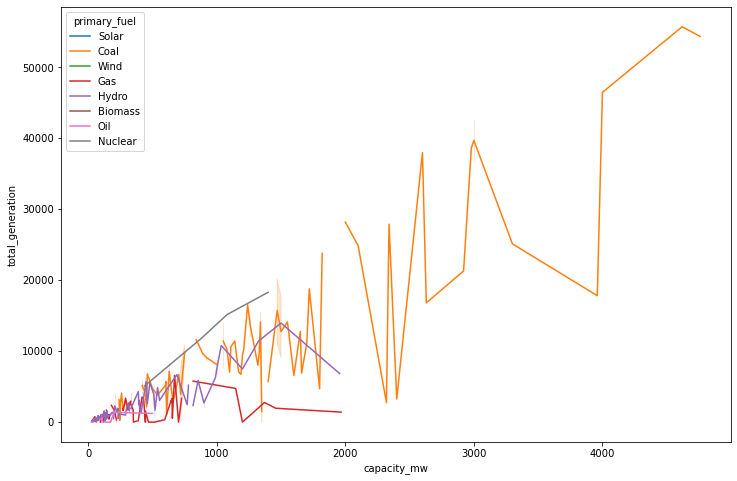

In [58]:
plt.figure(figsize=(12,8))
sns.lineplot(x='capacity_mw',y='total_generation',hue = 'primary_fuel',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='total_generation'>

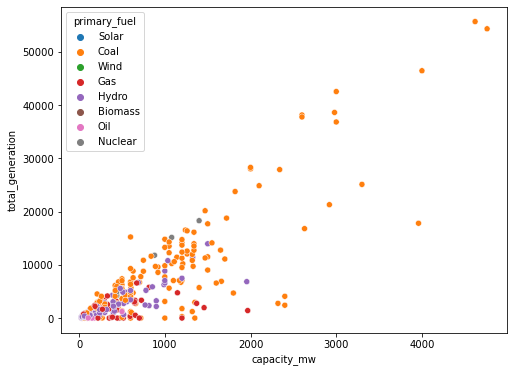

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='capacity_mw',y='total_generation',hue = 'primary_fuel',data=df)

With the help of linegraph and scatterplot we are able to find the relation between capacity mw and total generation for 
primary fuel. Coal is the most generating fuel among all and having more capacity too. except this rest all are almost are having
same electricity generation and capacity to generate the same.

In [76]:
df.groupby('primary_fuel')['capacity_mw'].value_counts()

primary_fuel  capacity_mw
Biomass       10.000          6
              16.000          5
              24.000          5
              20.000          3
              26.000          3
              12.500          2
              15.000          2
              18.000          2
              18.900          2
              22.000          2
              28.000          2
              30.000          2
              11.000          1
              11.200          1
              12.960          1
              16.500          1
              17.000          1
              17.500          1
              19.700          1
              19.800          1
              22.800          1
              25.000          1
              25.500          1
              31.500          1
              36.000          1
              50.000          1
Coal          600.000        19
              1200.000       16
              500.000        13
              1000.000        7
              

from this we can see which fuel is having more capacity to generate electricity and in which we got the same result as in graph above
. Coal is the most generating fuel for any of the plant

In [75]:
df.groupby('primary_fuel')['total_generation'].value_counts()

primary_fuel  total_generation
Coal          0.000000            6
              22.755000           1
              95.000000           1
              144.289000          1
              244.388000          1
              268.055700          1
              377.227800          1
              399.424000          1
              549.370000          1
              568.165900          1
              571.860000          1
              682.181300          1
              914.790000          1
              926.463000          1
              937.140000          1
              953.860000          1
              964.090000          1
              1048.241000         1
              1202.450000         1
              1225.871350         1
              1354.830000         1
              1480.958400         1
              1780.811000         1
              1855.020000         1
              1975.219000         1
              2044.809087         1
              2134.851000        

coal is the most generating fuel 

<AxesSubplot:xlabel='primary_fuel', ylabel='total_generation'>

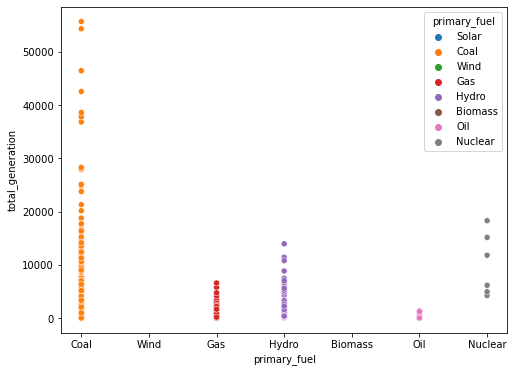

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='primary_fuel',y='total_generation',hue = 'primary_fuel',data=df)

In [74]:
df.groupby('capacity_mw')['total_generation'].value_counts()

capacity_mw  total_generation
25.200       0.000000            1
27.000       97.669200           1
28.300       208.542050          1
30.000       24.914800           1
             77.152300           1
             108.654000          1
             222.561600          1
             232.740450          1
             270.868850          1
             323.603850          1
             333.006600          1
30.600       195.537400          1
32.000       147.459000          1
             254.650350          1
             272.361350          1
32.500       336.280988          1
32.800       143.691930          1
33.750       318.429850          1
34.000       155.419000          1
35.000       0.000000            1
             202.860600          1
36.000       0.000000            1
             262.351650          1
             266.590350          1
             291.694200          1
36.800       0.000000            1
37.500       425.073950          1
39.200       113.808100  

<AxesSubplot:xlabel='total_generation', ylabel='capacity_mw'>

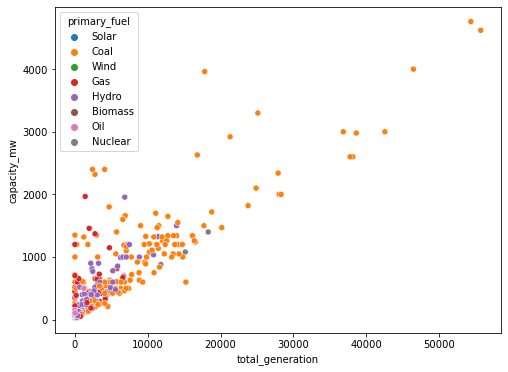

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_generation',y='capacity_mw',hue = 'primary_fuel',data=df)

Here also we can see that coal is the leading fuel to generate more electricity for any of the powerplant. And most of them 
falls under 10000 generating capacity and total output.

### Primary fuel vs other fuel

In [81]:
df.groupby('primary_fuel')['other_fuel1'].value_counts()

primary_fuel  other_fuel1 
Coal          Oil             189
              Cogeneration      1
Gas           Oil               7
Oil           Gas               2
Name: other_fuel1, dtype: int64

here common between two are coal, oil nand gas 

In [82]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [83]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

in other fuel we are having three category of fuel while in primary fuel we are having total 8 category

<AxesSubplot:xlabel='primary_fuel', ylabel='other_fuel1'>

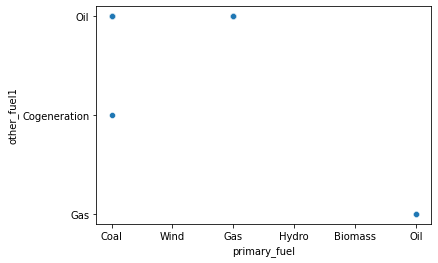

In [85]:
sns.scatterplot(x='primary_fuel',y='other_fuel1',data=df)

With the help of scatter plot too we can see the common fuel between two which are oil coal and gas

In [87]:
df.groupby('commissioning_year')['primary_fuel'].value_counts()

commissioning_year  primary_fuel
1927.0              Hydro            1
1937.0              Hydro            1
1939.0              Hydro            1
1943.0              Hydro            1
1946.0              Hydro            1
1949.0              Hydro            1
1952.0              Hydro            2
1953.0              Hydro            1
1954.0              Hydro            1
1955.0              Hydro            2
1956.0              Hydro            1
1957.0              Hydro            5
1958.0              Hydro            1
1959.0              Hydro            1
1960.0              Hydro            3
1961.0              Hydro            3
1962.0              Hydro            3
1963.0              Hydro            3
1964.0              Hydro            2
1965.0              Hydro            1
                    Oil              1
1966.0              Hydro            3
                    Coal             1
1967.0              Hydro            2
1968.0              Hydro      

As we can see above that with the time power plant has increased the fuel type. started in 1927 most of the power plant were using
only Hydro and by 2018 most used fuels are coal and hydro. But most primary fuel items were used from 1990 till 2015 and after that 
again it has been limited to hydro and coal

<Figure size 576x432 with 0 Axes>

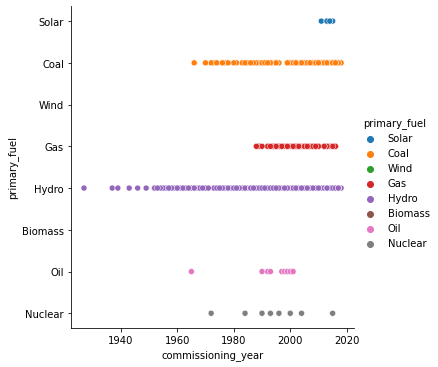

In [91]:
plt.figure(figsize=(8,6))
sns.relplot(x='commissioning_year',y = 'primary_fuel',hue = 'primary_fuel',data=df)

hydro is the most used fuel in these years for generating electricity by any of the powerplant in India and the least used fuel
is solar 

In [101]:
df.groupby('primary_fuel')['owner'].value_counts()

primary_fuel  owner                                                      
Biomass       Shree Sugars ltd                                               3
              Shri Ssk ltd                                                   3
              Nsl Sugars ltd                                                 2
              Ashok Ssk ltd                                                  1
              Bannari Sugars ltd                                             1
              Core Fuels ltd                                                 1
              Datta Ssk ltd                                                  1
              Daund Sugar ltd                                                1
              Davangere Co ltd                                               1
              Dr Ssk ltd                                                     1
              Gangakhed Energy ltd                                           1
              Gem Sugars ltd                             

Coal, solar and wind are the most used fuel by any f the owner of powerplant 

## Data Cleaning

### Filling missing values 

In [106]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'year_of_capacity_data', 'generation_data_source', 'total_generation'],
      dtype='object')

In [127]:
df_new.isna().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     566
source                      0
generation_data_source      0
total_generation            0
dtype: int64

In [119]:
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

In [120]:
# Deleting year of capacity data as having commencing year and might be a chance of multicollinearity 
df_new.drop(columns=['year_of_capacity_data'],inplace=True)

In [108]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [110]:
# Replacing all null values of categorical column to nan
df_new = df.replace(' ?',np.nan)
df_new.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,2018.0,Central Electricity Authority,1249.567192
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,2018.0,Central Electricity Authority,4703.840000


In [112]:
df_new['latitude']=df_new['latitude'].replace(np.NaN,df_new['latitude'].mean())

In [114]:
df_new['longitude']=df_new['longitude'].replace(np.NaN,df_new['longitude'].mean())
df_new['total_generation']=df_new['total_generation'].replace(np.NaN,df_new['total_generation'].mean())

In [126]:
df_new['commissioning_year']=df_new['commissioning_year'].replace(np.NaN,df_new['commissioning_year'].mean())

In [121]:
df_new['other_fuel1']=df_new['other_fuel1'].replace(np.NaN,df_new['other_fuel1'].mode()[0])
df_new['generation_data_source']=df_new['generation_data_source'].replace(np.NaN,df_new['generation_data_source'].mode()[0])

In [130]:
# Deleting owner column as having source 
df_new.drop(columns=['owner'],inplace=True)

In [131]:
df_new.shape

(908, 10)

In [132]:
df_index=np.where(df['primary_fuel'].isnull()==True)

In [133]:
new_df = df.loc[df_index]
new_df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,year_of_capacity_data,generation_data_source,total_generation


no null values 

# Feature Engineering

In [134]:
df_new.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,generation_data_source,total_generation
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.000000,National Renewable Energy Laboratory,Central Electricity Authority,4803.186746
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,1996.876894,Ultratech Cement ltd,Central Electricity Authority,4803.186746
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,1996.876894,CDM,Central Electricity Authority,4803.186746
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Central Electricity Authority,Central Electricity Authority,1249.567192
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Central Electricity Authority,Central Electricity Authority,4703.840000


In [137]:
le = LabelEncoder()
df1 = le.fit_transform(df_new['name'])

In [138]:
df_new['name']=df1

In [139]:
df2 = le.fit_transform(df_new['primary_fuel'])
df_new['primary_fuel']=df2
df3 = le.fit_transform(df_new['other_fuel1'])
df_new['other_fuel1']=df3
df4 = le.fit_transform(df_new['source'])
df_new['source']=df4
df5 = le.fit_transform(df_new['generation_data_source'])
df_new['generation_data_source']=df5

In [140]:
df_new.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,generation_data_source,total_generation
0,0,2.5,28.1839,73.2407,6,2,2011.000000,109,0,4803.186746
1,1,98.0,24.7663,74.6090,1,2,1996.876894,174,0,4803.186746
2,2,39.2,21.9038,69.3732,7,2,1996.876894,21,0,4803.186746
3,3,135.0,23.8712,91.3602,2,2,2004.000000,22,0,1249.567192
4,4,1800.0,21.9603,82.4091,1,2,2015.000000,22,0,4703.840000


# checking skewness in data

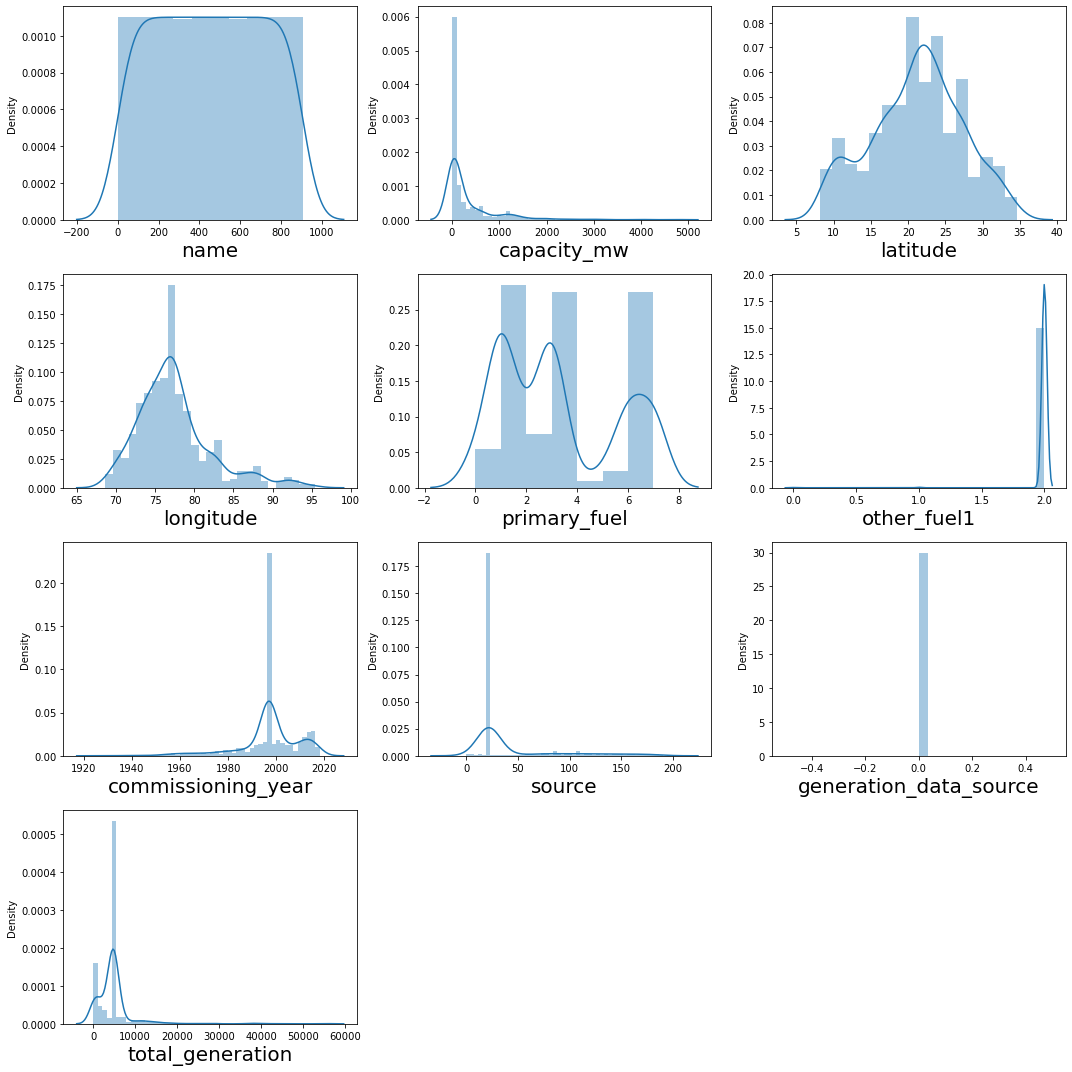

In [141]:
# Checking skewness in continous data
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df_new:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [144]:
df_new.skew()

name                       0.000000
capacity_mw                3.193257
latitude                  -0.147391
longitude                  1.129836
primary_fuel               0.471141
other_fuel1              -20.464435
commissioning_year        -1.383330
source                     1.829145
generation_data_source     0.000000
total_generation           5.175433
dtype: float64

with the help of graph we can see that there are some right skewed and come are left skewed columns which we need to treat.
Will use log1p method to fix the same.

In [145]:
skew = ['capacity_mw','longitude','total_generation']

In [146]:
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [148]:
df_new.skew()

name                       0.000000
capacity_mw                0.125029
latitude                  -0.147391
longitude                  0.924113
primary_fuel               0.471141
other_fuel1              -20.464435
commissioning_year        -1.383330
source                     1.829145
generation_data_source     0.000000
total_generation          -2.957489
dtype: float64

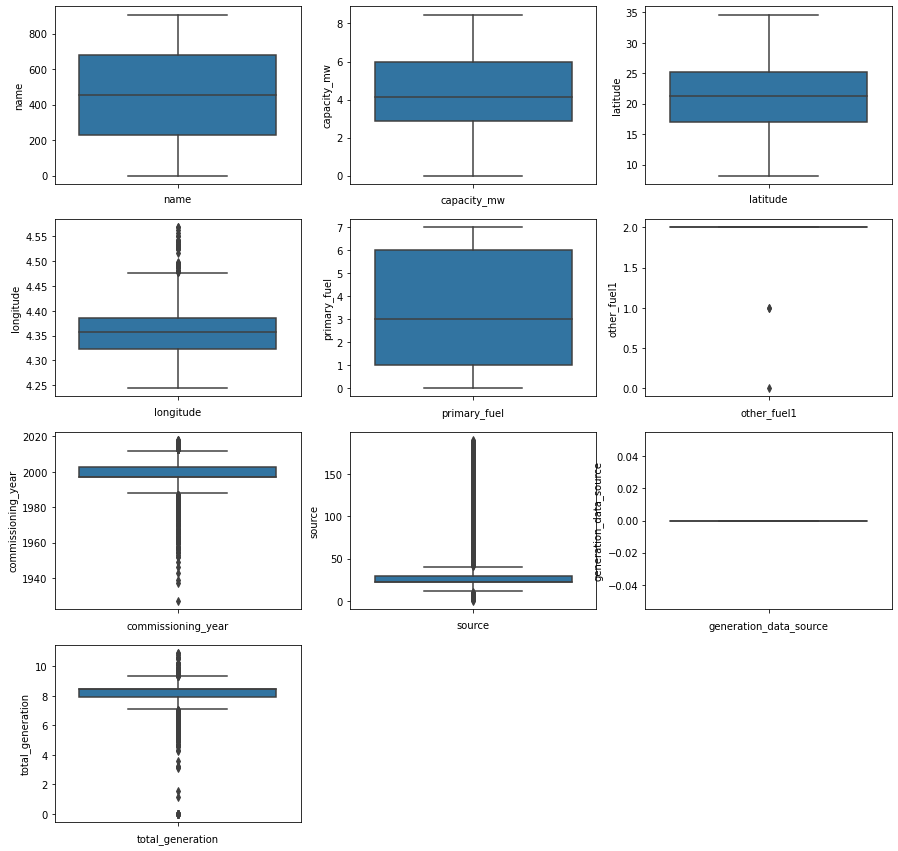

In [149]:
# Let's check outliers 
plt.figure(figsize=(15,15))

graph=1

for column in df_new.columns:
    if graph<=12:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(y=df_new[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

outliers found in:
1. longitude
2. total_generation

In [150]:
from scipy.stats import zscore

In [152]:
dfcontcol = df_new[['longitude','total_generation']]

In [155]:
# applying zscore on only the dataset which has continuous columns
z=np.abs(zscore(dfcontcol))
df_out=df_new[(z<3).all(axis=1)]

In [156]:
print("shape before and after")
print("shape before".ljust(20),":", df_new.shape)
print("shape after".ljust(20),":", df_out.shape)
print("Percentage Loss".ljust(20),":", (df_new.shape[0]-df_out.shape[0])/df_new.shape[0])

shape before and after
shape before         : (908, 10)
shape after          : (875, 10)
Percentage Loss      : 0.03634361233480176


data loss is very less here so we can procees further for model building

## correlation among features

In [157]:
df_out.corr()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,generation_data_source,total_generation
name,1.000000,0.017747,-0.137344,0.037717,0.034117,-0.061750,-0.036496,-0.015410,NaN,0.059795
capacity_mw,0.017747,1.000000,0.061075,0.336294,-0.531716,-0.036632,0.246967,-0.388971,NaN,0.067628
latitude,-0.137344,0.061075,1.000000,-0.003740,-0.010239,0.035037,0.099617,0.062334,NaN,0.066469
longitude,0.037717,0.336294,-0.003740,1.000000,-0.379572,0.018262,0.090442,-0.249193,NaN,-0.096135
primary_fuel,0.034117,-0.531716,-0.010239,-0.379572,1.000000,0.017574,-0.112085,0.047490,NaN,0.025506
other_fuel1,-0.061750,-0.036632,0.035037,0.018262,0.017574,1.000000,0.002454,0.022658,NaN,0.008305
commissioning_year,-0.036496,0.246967,0.099617,0.090442,-0.112085,0.002454,1.000000,0.028983,NaN,0.240925
source,-0.015410,-0.388971,0.062334,-0.249193,0.047490,0.022658,0.028983,1.000000,NaN,0.171651
generation_data_source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_generation,0.059795,0.067628,0.066469,-0.096135,0.025506,0.008305,0.240925,0.171651,NaN,1.000000


In [158]:
df_out.drop(columns=['generation_data_source'],inplace=True)

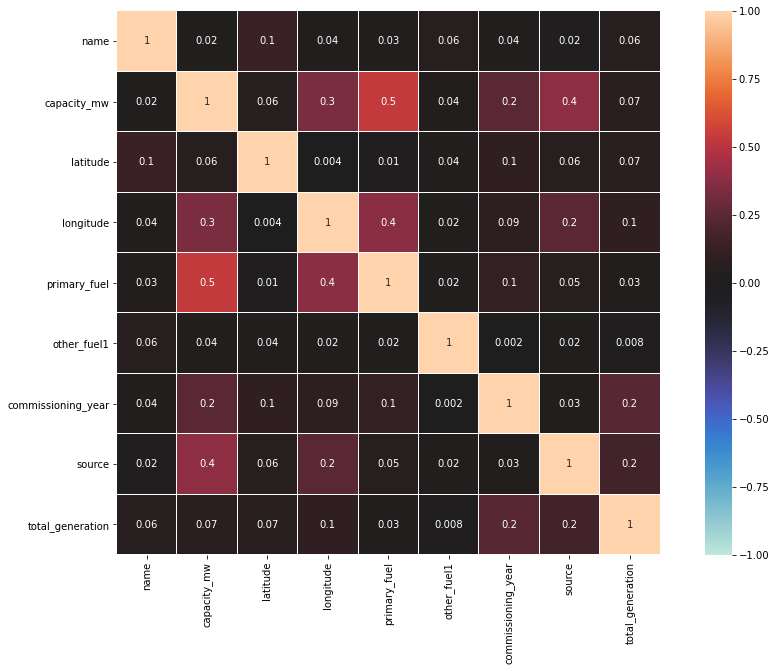

In [159]:
# Checking correlation with the help of heatmap
df_corr = df_out.corr().abs()

plt.figure(figsize = (16,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


Here correlation between feature are less as correlation lies between +-1

# Preprocessing

In [160]:
# Splitting Target and feature variable into x and y
x = df_out.drop(columns = ['primary_fuel'])
y = df_out['primary_fuel']

x is here our feature and y is our target

In [161]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[-1.73124082, -1.60802697,  1.14657422, ...,  1.09875973,
         1.42661333,  0.34396308],
       [-1.72743692,  0.17406177,  0.58757199, ...,  0.01334528,
         2.86531811,  0.34396308],
       [-1.72363301, -0.30647117,  0.1193651 , ...,  0.01334528,
        -0.5211716 ,  0.34396308],
       ...,
       [ 1.71129098, -0.5286605 , -0.96474853, ...,  0.01334528,
        -0.5211716 ,  0.34396308],
       [ 1.71509488,  0.06706751,  0.51947958, ...,  0.01334528,
         0.31991735,  0.34396308],
       [ 1.71889879, -0.74990162, -1.8384185 , ...,  0.01334528,
        -0.5211716 ,  0.34396308]])

# Finding Best Random state

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [163]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)
        

Best Accuracy score is: 0.8517110266159695 On Random state:  9


In [164]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,random_state=i,test_size=0.30)

In [165]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.70      0.67      0.68        84
           2       0.36      0.53      0.43        15
           3       0.76      0.84      0.79        67
           4       0.00      0.00      0.00         4
           5       0.33      0.33      0.33         3
           6       0.84      0.82      0.83        39
           7       1.00      1.00      1.00        36

    accuracy                           0.75       263
   macro avg       0.60      0.58      0.58       263
weighted avg       0.75      0.75      0.74       263



In [166]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7794285714285716


In [167]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred =RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.82      0.82      0.82        84
           2       0.50      0.40      0.44        15
           3       0.84      0.96      0.90        67
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.90      0.92      0.91        39
           7       0.95      1.00      0.97        36

    accuracy                           0.84       263
   macro avg       0.61      0.60      0.60       263
weighted avg       0.82      0.84      0.83       263



In [168]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8262857142857143


In [169]:
SV = SVC()
SV.fit(x_train,y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.76      0.76      0.76        84
           2       0.00      0.00      0.00        15
           3       0.70      0.78      0.74        67
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.86      0.62      0.72        39
           7       0.60      0.97      0.74        36

    accuracy                           0.70       263
   macro avg       0.44      0.47      0.45       263
weighted avg       0.66      0.70      0.67       263



In [170]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.28914285714285715


Got RandomForestClassfier as best model compare to others so will use hyperparameter tuning on the same

# Hyperparameter Tuning

In [174]:
# RandomForestClassifier
param = {'n_estimators':[100,500,700],
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10],
        'max_features':['auto','sqrt','log2']}

In [175]:
GC = GridSearchCV(RFC,param,cv=5)

In [176]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 700]})

In [177]:
GC.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [178]:
final_rfc = RandomForestClassifier(criterion = 'entropy',max_depth = 10, max_features = 'auto',n_estimators = 100)
final_rfc.fit(x_train,y_train)
pred = final_rfc.predict(x_test)
acc = accuracy_score(pred,y_test)
print(acc*100)

83.65019011406845


# Predicting on Capacity_mw

In [180]:
df_out.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,total_generation
0,0,1.252763,28.1839,4.307313,6,2,2011.000000,109,8.477243
1,1,4.595120,24.7663,4.325575,1,2,1996.876894,174,8.477243
2,2,3.693867,21.9038,4.253813,7,2,1996.876894,21,8.477243
3,3,4.912655,23.8712,4.525696,2,2,2004.000000,22,7.131352
4,4,7.496097,21.9603,4.423757,1,2,2015.000000,22,8.456347


In [181]:
x1 = df_out.drop(columns=['capacity_mw'])
y1 = df_out['capacity_mw']                 

Splitting feature and target into x1 and y1 as feature and target respectively

In [183]:
scaler_c=StandardScaler()
x_scaler_c=scaler_c.fit_transform(x1)
x_scaler_c

array([[-1.73124082,  1.14657422, -0.91354085, ...,  1.09875973,
         1.42661333,  0.34396308],
       [-1.72743692,  0.58757199, -0.58584661, ...,  0.01334528,
         2.86531811,  0.34396308],
       [-1.72363301,  0.1193651 , -1.87350529, ...,  0.01334528,
        -0.5211716 ,  0.34396308],
       ...,
       [ 1.71129098, -0.96474853, -0.35662174, ...,  0.01334528,
        -0.5211716 ,  0.34396308],
       [ 1.71509488,  0.51947958, -0.79142038, ...,  0.01334528,
         0.31991735,  0.34396308],
       [ 1.71889879, -1.8384185 ,  0.0821399 , ...,  0.01334528,
        -0.5211716 ,  0.34396308]])

# Finding best Random State

In [207]:
# Importing important libraries for model fitting
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [185]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler_c,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    rsc = r2_score(y1_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.7871708510124651 On Random state:  702


In [186]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler_c,y1,test_size=0.30,random_state=i)

In [187]:
lr = LinearRegression()
lr.fit(x1_train,y1_train)
pred = lr.predict(x1_test)
print(r2_score(y1_test,pred))

0.5498493363325013


In [188]:
print(cross_val_score(lr,x_scaler_c,y1,cv=5).mean())

0.45133392210398615


In [189]:
dt = DecisionTreeRegressor()
dt.fit(x1_train,y1_train)
pred = dt.predict(x1_test)
print(r2_score(y1_test,pred))

0.6006874406680596


In [191]:
print(cross_val_score(dt,x_scaler_c,y1,cv=5).mean())

0.5731838844630683


In [192]:
rf = RandomForestRegressor()
rf.fit(x1_train,y1_train)
pred = rf.predict(x1_test)
print(r2_score(y1_test,pred))

0.7766746705633555


In [193]:
print(cross_val_score(rf,x_scaler_c,y1,cv=5).mean())

0.7791669807739399


Best model after comparing from cv score we got RandomForst as a best model so will do hyperparameter tuning on the same

### Checking whether my model is overfitting model or not using lasso and ridge

In [194]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x1_train,y1_train)

LassoCV(normalize=True)

In [195]:
alpha = lassocv.alpha_
alpha

0.002357968387148837

In [196]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x1_train,y1_train)

Lasso(alpha=0.002357968387148837)

In [197]:
lasso_reg.score(x1_test,y1_test)

0.5489865379492984

In [198]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x1_train,y1_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [199]:
alpha = ridgecv.alpha_
alpha

0.1

In [200]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x1_train,y1_train)

Ridge(alpha=0.1)

In [201]:
ridge_reg.score(x1_test,y1_test)

0.5498294868763389

Our model is not an overfitting model as checked via ridge and lasso getting almost same score as in linear regression

# Hyperparameter Tuning

In [215]:
# RandomForestRegressor
param_r = {'n_estimators':[120,180,230,425,500,700],
        'criterion':['mse','mae'],
        'max_depth':[5,10,15,20,25,30],
        'max_features':['auto','sqrt','log2'],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[2,4,6]}

In [216]:
RF = RandomizedSearchCV(rf,param_r,cv=5)

In [217]:
RF.fit(x1_train,y1_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [120, 180, 230, 425,
                                                         500, 700]})

In [218]:
RF.best_params_

{'n_estimators': 425,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'mse'}

In [219]:
final_RFC = RandomForestRegressor(min_samples_split = 10,min_samples_leaf = 2,criterion = 'mse',max_depth = 20, max_features = 'auto',n_estimators = 425)
final_RFC.fit(x1_train,y1_train)
pred = final_RFC.predict(x1_test)
score = r2_score(pred,y1_test)
print(score*100)

72.72088460388814


Even after increasing parameter too score has been reduced compare to r2_score 

# Save the model

In [226]:
import joblib
joblib.dump(final_rfc,'FinalmodelGlobalpowerplant.pk1')

['FinalmodelGlobalpowerplant.pk1']